In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import numpy as np
import os
os.chdir('/home/xzhoubi/hudson/VAE_baselines')
import matplotlib.pyplot as plt
import torch
from torch import optim
from utils import *
from model import *
from tqdm import tqdm
os.environ["CUDA_VISIBLE_DEVICES"] = "6"


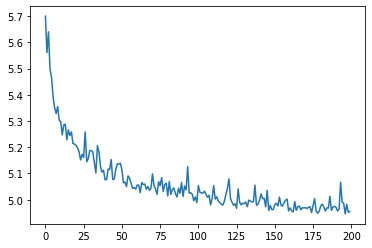

In [4]:
load_path = "/home/xzhoubi/hudson/VAE_baselines/save/"
test_BPD_list = np.load(load_path + 'test_BPD.npy')

plt.figure()
plt.plot(test_BPD_list)
plt.show()

In [5]:
opt = {}
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    opt["device"] = torch.device("cuda:0")
    opt["if_cuda"] = True
else:
    opt["device"] = torch.device("cpu")
    opt["if_cuda"] = False

opt['data_set'] = 'CIFAR'
opt['x_dis'] = 'Logistic'  ## or MixLogistic
opt['z_channels'] = 16  ## 2*64
opt['epochs'] = 1000
opt['dataset_path'] = '../data/'
opt['save_path'] = './save/'
opt['result_path'] = './result/'
opt['batch_size'] = 100
opt['test_batch_size'] = 200
opt['if_regularizer'] = False
opt['load_model'] = False
opt['lr'] = 1e-4
opt['data_aug'] = False
opt["seed"] = 0
opt['if_save'] = True
opt['save_epoch'] = 50
opt['additional_epochs'] = 100
opt['sample_size'] = 100
opt['if_save'] = True

In [6]:
train_data,test_data,train_data_evaluation=LoadData(opt)
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(load_path + f"model_CIFAR_{opt['z_channels']}.pth"))

train_data, test_data, train_data_evaluation = LoadData(opt)

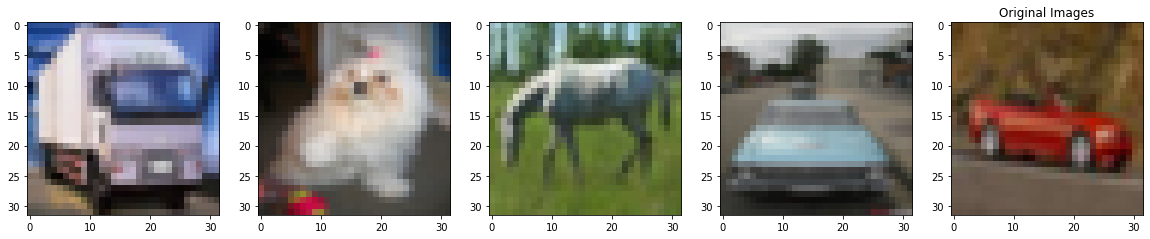

In [7]:
for x, _ in train_data:
    L = -model(x.to(opt['device']))
    break

fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    ax[i].imshow(x[i, :].detach().cpu().numpy().transpose(1, 2, 0))
plt.title("Original Images")
plt.show()

In [8]:
z_mu, z_std = model.encoder(x.to(opt['device']))
eps = torch.randn_like(z_mu).to(opt['device'])
zs = eps.mul(z_std).add_(z_mu)
pxz_params = model.decoder(zs)
x_hat = model.sample_op(pxz_params)

In [9]:
z_std.shape

torch.Size([100, 1024])

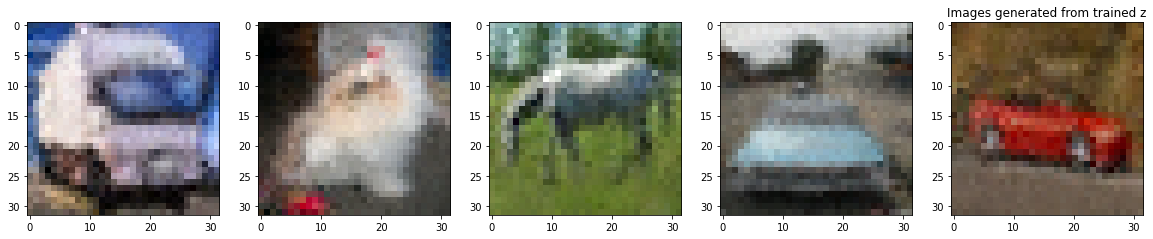

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    ax[i].imshow(x_hat[i, :].detach().cpu().numpy().transpose(1, 2, 0))
plt.title("Images generated from trained z")
plt.show()

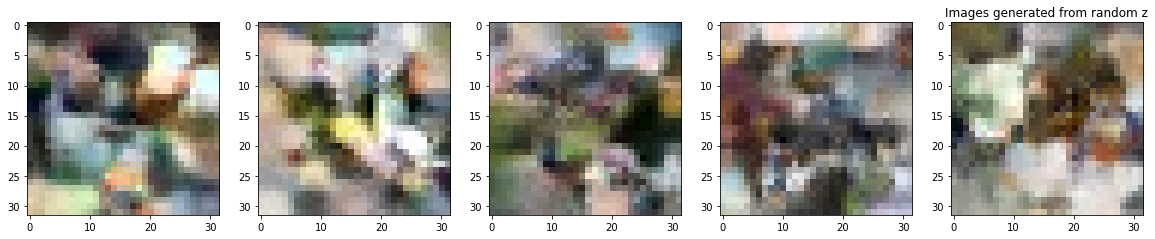

In [11]:
eps = torch.randn(10, 16 * 64).to(opt['device'])
pxz_params = model.decoder(eps)
x_gen_noise = model.sample_op(pxz_params)

fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    ax[i].imshow(x_gen_noise[i, :].detach().cpu().numpy().transpose(1, 2, 0))
plt.title("Images generated from random z")
plt.show()

In [14]:
z_mu.shape

torch.Size([100, 1024])

In [39]:
# ## Save latent variable z, which will be used to model with auto-regressive modelling
# z_mu_list = []
# z_std_list = []
# with torch.no_grad():
#     for x, _ in train_data:
#         z_mu, z_std = model.encoder(x.to(opt['device']))
#         z_std_list.append(z_std.cpu().numpy())
#         z_mu_list.append(z_mu.cpu().numpy())
    


In [41]:
# import pickle
# z_dict = {}
# z_mu_array = np.concatenate(z_mu_list, axis = 0).reshape([-1, 16 * 8 * 8])
# z_std_array = np.concatenate(z_std_list, axis = 0).reshape([-1, 16 * 8 * 8])
# z_dict["mean"] = z_mu_array
# z_dict["std"] = z_std_array

# with open("/home/xzhoubi/hudson/VAE_baselines/save/latent_CIFAR_16.pickle", 'wb') as handle:
#     pickle.dump(z_dict, handle)
    


In [43]:
# z_std

tensor([[0.0536, 0.0295, 0.0207,  ..., 0.9970, 0.9998, 1.0058],
        [0.0423, 0.0348, 0.0405,  ..., 0.9992, 0.9973, 1.0004],
        [0.0664, 0.0788, 0.0825,  ..., 1.0203, 1.0135, 0.9867],
        ...,
        [0.0223, 0.0218, 0.0224,  ..., 1.0070, 1.0088, 0.9940],
        [0.0410, 0.0446, 0.0445,  ..., 1.0033, 0.9975, 1.0040],
        [0.0490, 0.0552, 0.0630,  ..., 0.9979, 0.9959, 0.9934]],
       device='cuda:0')